In [22]:
import requests
from bs4 import BeautifulSoup
headers = {
 'User-Agent':'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'   
}
res  = requests.get('https://rent.591.com.tw/house-rentSale.html?type=1&search_type=kind&search_val=1', headers = headers)
soup = BeautifulSoup(res.text)
arealist = []
for area in  soup.select('.rentByArea'):
    arealist.append(area.text.strip().strip(u'坪'))

pricelist = []
for price in  soup.select('.price'):
    pricelist.append(price.text.strip().strip(u'元'))

for price, area in zip(pricelist, arealist):
    print price, area

5,000 8
42,000 40
18,600 8.3
40,000 20
24,300 25
55,000 45
40,000 35
35,000 18
24,000 16.3
40,000 44
30,000 38
28,500 28
50,000 24
38,000 34
69,000 37
27,000 15
25,000 30.8
76,800 52
32,008 35
33,000 13


In [24]:
import pandas 
df  = pandas.read_csv('C:\\Users\\Student\\house_rental.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [31]:
df.

AttributeError: 'Series' object has no attribute 'toarray'

In [36]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(df['Sqft'].as_matrix(), df['Price'])

C:\Users\Student\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found arrays with inconsistent numbers of samples: [  1 645]

In [60]:
# Load Boston Dataset
from sklearn.datasets import load_boston
data = load_boston()
print data.keys()

['data', 'feature_names', 'DESCR', 'target']


In [61]:
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## 分成訓練與測試資料集

In [62]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [63]:
data.data.shape

(506L, 13L)

In [64]:
X_train.shape # use 379 data to build a model

(379L, 13L)

In [65]:
y_train.shape

(379L,)

In [66]:
X_test.shape # use 127 data to test the model

(127L, 13L)

In [67]:
y_test.shape

(127L,)

## 建立模型

In [68]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 房價預測

In [70]:
predicted = clf.predict(X_test) # predicted 是我的預測結果

In [72]:
predicted

array([ 19.95242864,   8.99953568,  21.30644353,  36.25774205,
        21.37576813,  29.29189497,  27.83596799,  13.96046628,
        35.16864464,  38.62585006,  29.64607339,  30.5658755 ,
        33.04568662,  35.27389022,  27.59273171,  14.72807712,
        17.75284774,  27.62373617,  35.90924857,  17.4789049 ,
        30.41103997,  25.15122757,  19.8652385 ,  19.24345562,
        22.9084639 ,  41.92319339,  24.03478352,  13.64368982,
        23.49612087,  17.59170115,  35.47482842,  15.43937936,
        21.84834764,  24.91227587,  40.59764712,  25.55644095,
        17.37369781,  32.01467198,  32.52485152,  18.65478704,
        26.72238085,  31.01081897,  40.86810654,  21.39673133,
        37.14583289,  10.48138491,  20.67913037,  32.1303555 ,
        37.42590203,  15.24309576,  19.70385788,  20.08900726,
        16.97954005,  26.72393666,  25.60496263,  18.99299898,
        34.84747419,  20.9458473 ,   5.54389445,  10.56492363,
        23.45067607,  19.18359771,  15.53043066,  25.46

In [73]:
#真實房價
expected = y_test
expected

array([ 19.5,   7. ,  22. ,  33.3,  22. ,  22.5,  36.2,  13.1,  33.4,
        21.9,  23. ,  30.5,  50. ,  33.1,  24.5,  15. ,  14.5,  25. ,
        35.2,  17.1,  32.7,  18.5,  18.8,  19.9,  22.7,  48.5,  21.9,
        13.5,  22.4,  22.5,  36.5,  15.6,  20.3,  22.9,  46. ,  23.3,
        13.4,  29. ,  31.5,  18.9,  23.9,  30.7,  50. ,  21.2,  48.3,
         8.3,  23.1,  31.6,  44. ,  16.6,  15.2,  23. ,  10.2,  22.1,
        22.2,  18.5,  34.6,  16.8,   8.8,  23.1,  20.1,  14.6,   8.4,
        24.2,  24.5,  23.9,  19.3,  27.5,  18.6,  25.3,  50. ,  19.6,
         7.4,  36.2,  25. ,  20.9,  19.7,  41.7,  26.4,  18.4,  13.6,
        17.8,  24.8,  23. ,  20.4,  16. ,  23.5,  21. ,  14.1,  21.4,
        21.4,  29.8,  21.2,  19.4,  35.1,  17.5,  34.9,  37.2,  24.1,
        21.6,  18.8,  29.8,  20. ,  23.1,  14.3,  14.4,  26.5,  21.7,
        17.3,  21.8,  16.5,  29.4,  16.2,  30.3,  18.2,  14.5,  21.7,
        12. ,  23.8,  11.3,  22.2,  13.8,  24.3,  18.2,  19.3,  27.1,  19.4])

Populating the interactive namespace from numpy and matplotlib
MSE: 4.33796125669


`%matplotlib` prevents importing * from pylab and numpy


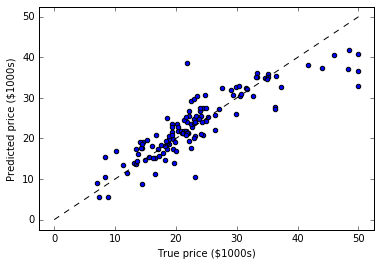

In [74]:
%pylab inline
# Plot the data
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

# Compute Mean Square Error
print "MSE:", np.sqrt(np.mean((predicted - expected) ** 2))